## Feature Binning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(columns=['CustomerId', 'RowNumber', 'Surname'], axis=1, inplace=True)

In [ ]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.Age.min()

18.0

In [ ]:
df.Age.max()

92.0

In [ ]:
labels = ['0-20', '21-40', '41-60', 'Above 61']
bins = [0, 20, 40, 60, 100 ]

df['Age_bins'] = pd.cut(df.Age, bins, labels = labels, include_lowest=True)

In [ ]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,41-60
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,41-60


In [ ]:
df[['Age', 'Age_bins']].to_csv('test.csv')

In [ ]:
df.Age_bins.value_counts()

21-40       6146
41-60       3021
Above 61     446
0-20          87
Name: Age_bins, dtype: int64

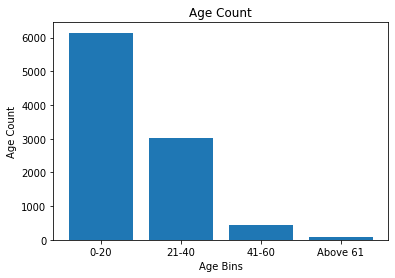

In [ ]:
# making the bar chart on the data
plt.bar(labels, df.Age_bins.value_counts())

# giving the title
plt.title('Age Count')

# giving X & Y labels
plt.xlabel('Age Bins')
plt.ylabel('Age Count')

# visualizing the plot
plt.show()

In [ ]:
def add_labels(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i])

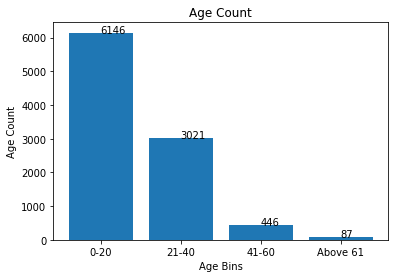

In [ ]:
# making the bar chart on the data
plt.bar(labels, df.Age_bins.value_counts())

# add labels
add_labels(labels, df.Age_bins.value_counts())

# giving the title
plt.title('Age Count')

# giving X & Y labels
plt.xlabel('Age Bins')
plt.ylabel('Age Count')

# visualizing the plot
plt.show()